# Predict Rental Prices
<br>
This repo contains the Predict Rental Prices project as part of my data science portfolio. The rental prices were scrapped from a property website based on properties located in Malaysia. Three different types of algorithms were used to train the models which consist of two machine learning (ML) and one deep learning (DL) algorithm. This project focuses on comparing the performance and results of these three algorithms instead of explaining the theory behind the algorithms as it assumes that readers already familiar with these algorithms. For readers who are in a hurry, they can dive straight into section 4. [Discussion and Conclusion](#conclusion)

1. [Linear Regression](#lr)
2. [Random Forest](#rf)
3. [Tensorflow with Keras](#tf)
4. [Discussion and Conclusion](#conclusion)


## Dataset

The rental prices were scrapped from a property website based on properties located in several states in Malaysia i.e. Kuala Lumpur, Selangor, Putrajaya and Johor. The data has been intentionally messed up and contain duplicates and errors in order to demonstrate the data wrangling / munging steps required to clean the data before using it to train the models. To know how to scrap web data using Python, kindly refer to my other project on [Web Scraping Project](https://github.com/limchiahooi/web-scraping-rental). 

**Why predict rental prices?** 
Firstly, it is an extension of my web scraping project. After the data has been scrapped, it is a natural progression to explore and model the relationships between the property features and the rental prices. Secondly, many research / tutorials have been focusing on training models to predict property selling prices, but relatively few on predicting property rental prices. This project aims to fill the gap and provide useful insights to property investors to help in their decision-making as to which property to purchase and rent out in order to maximize rental yield.

***
## Import libraries

In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Load data

In [2]:
# load data into dataframe 
rental = pd.read_csv("RentIndexRaw.csv", index_col=0, low_memory=False)
rental.head(5)

,BuiltUpSize,City,CreatedDateTime,CreatedUser,DataSourceID,Furnishing,Latitude,Longitude,NoOfBathroom,NoOfBedroom,...,Postcode,PostedDate,PropertyAddress,PropertyName,PropertyType,RentalPerMth,SourceUrl,State,UpdatedDateTime,UpdatedUser
ID,,,,,,,,,,,,,,,,,,,,,
1,1000,Bandar Utama,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.14195,101.616,2,3,...,47400,2018-07-30 00:00:00,Jalan Masjid,Pelangi Utama,Condominium,2200,https://www.iproperty.com.my/property/bandar-u...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
2,1000,Bandar Utama,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.14195,101.616,2,3,...,47400,2018-07-30 00:00:00,Jalan Masjid,Pelangi Utama,Condominium,2200,https://www.iproperty.com.my/property/bandar-u...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
3,1057,Petaling Jaya,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.12252,101.628,2,3,...,47300,2018-07-30 00:00:00,Jalan SS 2/72,Ken Damansara 3,Condominium,1980,https://www.iproperty.com.my/property/petaling...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
4,1057,Petaling Jaya,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.12252,101.628,2,3,...,47300,2018-07-30 00:00:00,Jalan SS 2/72,Ken Damansara 3,Condominium,1980,https://www.iproperty.com.my/property/petaling...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
5,0,Bandar Sunway,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.05930,101.616,2,2,...,47100,2018-07-30 00:00:00,Jalan Taylors,D' Latour,Condominium,2600,https://www.iproperty.com.my/property/bandar-s...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r


In [3]:
# check the summary info of the dataframe
rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54405 entries, 1 to 100736
Data columns (total 21 columns):
BuiltUpSize        54405 non-null int64
City               54391 non-null object
CreatedDateTime    54405 non-null object
CreatedUser        54405 non-null object
DataSourceID       54405 non-null int64
Furnishing         54405 non-null object
Latitude           54405 non-null float64
Longitude          54405 non-null float64
NoOfBathroom       54405 non-null int64
NoOfBedroom        54405 non-null int64
NoOfParking        54405 non-null int64
Postcode           54405 non-null object
PostedDate         54405 non-null object
PropertyAddress    54354 non-null object
PropertyName       54405 non-null object
PropertyType       54405 non-null object
RentalPerMth       54405 non-null int64
SourceUrl          54405 non-null object
State              54405 non-null object
UpdatedDateTime    54405 non-null object
UpdatedUser        54405 non-null object
dtypes: float64(2), int64(6), obj

## Drop Missing Values

In [4]:
# check for missing values
rental.isnull().sum()

BuiltUpSize         0
City               14
CreatedDateTime     0
CreatedUser         0
DataSourceID        0
Furnishing          0
Latitude            0
Longitude           0
NoOfBathroom        0
NoOfBedroom         0
NoOfParking         0
Postcode            0
PostedDate          0
PropertyAddress    51
PropertyName        0
PropertyType        0
RentalPerMth        0
SourceUrl           0
State               0
UpdatedDateTime     0
UpdatedUser         0
dtype: int64

In [5]:
# drop missing values
rental = rental.dropna()
rental = rental.reset_index(drop=True)

In [6]:
# check for missing values again
rental.isnull().sum()

BuiltUpSize        0
City               0
CreatedDateTime    0
CreatedUser        0
DataSourceID       0
Furnishing         0
Latitude           0
Longitude          0
NoOfBathroom       0
NoOfBedroom        0
NoOfParking        0
Postcode           0
PostedDate         0
PropertyAddress    0
PropertyName       0
PropertyType       0
RentalPerMth       0
SourceUrl          0
State              0
UpdatedDateTime    0
UpdatedUser        0
dtype: int64

## Remove Duplicate Values

In [7]:
print("There are {} duplicate values.".format(rental.duplicated().sum()))
rental[rental.duplicated(keep=False)].head(10)

There are 25229 duplicate values.


,BuiltUpSize,City,CreatedDateTime,CreatedUser,DataSourceID,Furnishing,Latitude,Longitude,NoOfBathroom,NoOfBedroom,...,Postcode,PostedDate,PropertyAddress,PropertyName,PropertyType,RentalPerMth,SourceUrl,State,UpdatedDateTime,UpdatedUser
0,1000,Bandar Utama,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.14195,101.616,2,3,...,47400,2018-07-30 00:00:00,Jalan Masjid,Pelangi Utama,Condominium,2200,https://www.iproperty.com.my/property/bandar-u...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
1,1000,Bandar Utama,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.14195,101.616,2,3,...,47400,2018-07-30 00:00:00,Jalan Masjid,Pelangi Utama,Condominium,2200,https://www.iproperty.com.my/property/bandar-u...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
2,1057,Petaling Jaya,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.12252,101.628,2,3,...,47300,2018-07-30 00:00:00,Jalan SS 2/72,Ken Damansara 3,Condominium,1980,https://www.iproperty.com.my/property/petaling...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
3,1057,Petaling Jaya,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.12252,101.628,2,3,...,47300,2018-07-30 00:00:00,Jalan SS 2/72,Ken Damansara 3,Condominium,1980,https://www.iproperty.com.my/property/petaling...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
4,0,Bandar Sunway,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.05930,101.616,2,2,...,47100,2018-07-30 00:00:00,Jalan Taylors,D' Latour,Condominium,2600,https://www.iproperty.com.my/property/bandar-s...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
5,0,Bandar Sunway,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.05930,101.616,2,2,...,47100,2018-07-30 00:00:00,Jalan Taylors,D' Latour,Condominium,2600,https://www.iproperty.com.my/property/bandar-s...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
7,1248,Subang Jaya,2018-08-04 09:31:52,SYSTEM_TH,4,Partly Furnished,3.05238,101.599,3,0,...,47500,2018-07-29 00:00:00,Jalan Subang Permai,The Regina,Condominium,1700,https://www.iproperty.com.my/property/subang-j...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
8,1248,Subang Jaya,2018-08-04 09:31:52,SYSTEM_TH,4,Partly Furnished,3.05238,101.599,3,0,...,47500,2018-07-29 00:00:00,Jalan Subang Permai,The Regina,Condominium,1700,https://www.iproperty.com.my/property/subang-j...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
10,1488,Ara Damansara,2018-08-04 09:31:52,SYSTEM_TH,4,Partly Furnished,3.11319,101.579,3,3,...,47301,2018-07-29 00:00:00,Jalan Pju 1A/4,The Potpourri,Condominium,4500,https://www.iproperty.com.my/property/ara-dama...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
11,1488,Ara Damansara,2018-08-04 09:31:52,SYSTEM_TH,4,Partly Furnished,3.11319,101.579,3,3,...,47301,2018-07-29 00:00:00,Jalan Pju 1A/4,The Potpourri,Condominium,4500,https://www.iproperty.com.my/property/ara-dama...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r


In [8]:
# remove duplicate values
rental = rental.drop_duplicates()
rental = rental.reset_index(drop=True)

In [9]:
# check for duplicate values after removing duplicates
print("There are {} duplicate values.".format(rental.duplicated().sum()))
rental.head()

There are 0 duplicate values.


,BuiltUpSize,City,CreatedDateTime,CreatedUser,DataSourceID,Furnishing,Latitude,Longitude,NoOfBathroom,NoOfBedroom,...,Postcode,PostedDate,PropertyAddress,PropertyName,PropertyType,RentalPerMth,SourceUrl,State,UpdatedDateTime,UpdatedUser
0,1000,Bandar Utama,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.14195,101.616,2,3,...,47400,2018-07-30 00:00:00,Jalan Masjid,Pelangi Utama,Condominium,2200,https://www.iproperty.com.my/property/bandar-u...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
1,1057,Petaling Jaya,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.12252,101.628,2,3,...,47300,2018-07-30 00:00:00,Jalan SS 2/72,Ken Damansara 3,Condominium,1980,https://www.iproperty.com.my/property/petaling...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
2,0,Bandar Sunway,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.05930,101.616,2,2,...,47100,2018-07-30 00:00:00,Jalan Taylors,D' Latour,Condominium,2600,https://www.iproperty.com.my/property/bandar-s...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
3,0,Ara Damansara,2018-08-04 09:31:52,SYSTEM_TH,4,Fully Furnished,3.12444,101.583,1,1,...,47301,2018-07-29 00:00:00,Jalan PJU 1A,Eve Suite / NZX Square,Serviced Residence,1800,https://www.iproperty.com.my/property/ara-dama...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r
4,1248,Subang Jaya,2018-08-04 09:31:52,SYSTEM_TH,4,Partly Furnished,3.05238,101.599,3,0,...,47500,2018-07-29 00:00:00,Jalan Subang Permai,The Regina,Condominium,1700,https://www.iproperty.com.my/property/subang-j...,Selangor,2018-08-04 09:31:52,SYSTEM_TH\r


## Clean Data

In [10]:
# select columns that we want to work with
rental = rental[["BuiltUpSize", "NoOfBathroom", "NoOfBedroom", "NoOfParking", "State", "Furnishing", "PropertyType", "RentalPerMth"]]
rental.head(10)

,BuiltUpSize,NoOfBathroom,NoOfBedroom,NoOfParking,State,Furnishing,PropertyType,RentalPerMth
0,1000,2,3,1,Selangor,Fully Furnished,Condominium,2200
1,1057,2,3,1,Selangor,Fully Furnished,Condominium,1980
2,0,2,2,0,Selangor,Fully Furnished,Condominium,2600
3,0,1,1,2,Selangor,Fully Furnished,Serviced Residence,1800
4,1248,3,0,2,Selangor,Partly Furnished,Condominium,1700
5,0,2,2,2,Selangor,Fully Furnished,Serviced Residence,2500
6,1488,3,3,3,Selangor,Partly Furnished,Condominium,4500
7,871,2,2,2,Selangor,Fully Furnished,Condominium,2500
8,0,2,3,2,Selangor,Partly Furnished,Condominium,1500
9,544,1,1,0,Selangor,Partly Furnished,Condominium,1200


In [11]:
# check for typo or wrong spelling for State column
rental["State"].value_counts()

selangor        16206
kuala-lumpur     7237
johor            5514
putrajaya         134
Selangor           20
Name: State, dtype: int64

In [12]:
# replace typo with the correct spelling
rental["State"] = rental["State"].replace("Selangor", "selangor")

In [13]:
# recheck again
rental["State"].value_counts()

selangor        16226
kuala-lumpur     7237
johor            5514
putrajaya         134
Name: State, dtype: int64

In [14]:
# check for typo or wrong spelling for Furnishing column
rental["Furnishing"].value_counts()

Fully Furnished     15553
Partly Furnished     9319
Unfurnished          4192
Unknown                47
Name: Furnishing, dtype: int64

In [15]:
# drop Unknown Furnishing values
rental = rental[rental["Furnishing"] != "Unknown"].reset_index(drop=True)

In [16]:
# recheck again
rental["Furnishing"].value_counts()

Fully Furnished     15553
Partly Furnished     9319
Unfurnished          4192
Name: Furnishing, dtype: int64

In [17]:
# check for typo or wrong spelling for Furnishing column
rental["PropertyType"].value_counts()

Serviced Residence            11901
Condominium                   11615
Apartment                      2576
2-sty Terrace/Link House       1185
Semi-detached House             483
Bungalow                        342
3-sty Terrace/Link House        237
Townhouse                       158
Flat                            145
Cluster House                   139
1-sty Terrace/Link House        116
2.5-sty Terrace/Link House      109
1.5-sty Terrace/Link House       25
4-sty Terrace/Link House         18
3.5-sty Terrace/Link House       11
Residential Land                  4
Name: PropertyType, dtype: int64

In [18]:
# Since we are working with property data, it is impossible or does not make sense to have 0 values for certain columns
# we need to drop observations with value = 0 for these columns

# drop BuiltUpSize = 0
rental = rental[rental["BuiltUpSize"] != 0].reset_index(drop=True)

# drop NoOfBedroom = 0
rental = rental[rental["NoOfBedroom"] != 0].reset_index(drop=True)

# drop NoOfBathroom = 0
rental = rental[rental["NoOfBathroom"] != 0].reset_index(drop=True)

# drop NoOfParking = 0
rental = rental[rental["NoOfParking"] != 0].reset_index(drop=True)

# drop RentalPerMth = 0
rental = rental[rental["RentalPerMth"] != 0].reset_index(drop=True)

rental.head(10)

,BuiltUpSize,NoOfBathroom,NoOfBedroom,NoOfParking,State,Furnishing,PropertyType,RentalPerMth
0,1000,2,3,1,selangor,Fully Furnished,Condominium,2200
1,1057,2,3,1,selangor,Fully Furnished,Condominium,1980
2,1488,3,3,3,selangor,Partly Furnished,Condominium,4500
3,871,2,2,2,selangor,Fully Furnished,Condominium,2500
4,700,1,1,1,selangor,Partly Furnished,Condominium,1300
5,1021,2,3,1,selangor,Fully Furnished,Serviced Residence,2500
6,1100,2,3,2,selangor,Partly Furnished,Condominium,2500
7,850,1,1,1,kuala-lumpur,Fully Furnished,Serviced Residence,2100
8,791,2,2,2,kuala-lumpur,Fully Furnished,Serviced Residence,1900
9,888,2,2,1,kuala-lumpur,Fully Furnished,Serviced Residence,3000


In [19]:
# check the summary info of the dataframe after cleaning the data
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13086 entries, 0 to 13085
Data columns (total 8 columns):
BuiltUpSize     13086 non-null int64
NoOfBathroom    13086 non-null int64
NoOfBedroom     13086 non-null int64
NoOfParking     13086 non-null int64
State           13086 non-null object
Furnishing      13086 non-null object
PropertyType    13086 non-null object
RentalPerMth    13086 non-null int64
dtypes: int64(5), object(3)
memory usage: 818.0+ KB


## Visualize Data

In [20]:
# calculate correlation matrix
corr = rental[["BuiltUpSize", "NoOfBathroom", "NoOfBedroom", "NoOfParking", "RentalPerMth"]].corr()
corr

,BuiltUpSize,NoOfBathroom,NoOfBedroom,NoOfParking,RentalPerMth
BuiltUpSize,1.000000,0.729533,0.653012,0.440725,0.041600
NoOfBathroom,0.729533,1.000000,0.732361,0.376870,0.027783
NoOfBedroom,0.653012,0.732361,1.000000,0.365076,0.030498
NoOfParking,0.440725,0.376870,0.365076,1.000000,0.021483
RentalPerMth,0.041600,0.027783,0.030498,0.021483,1.000000


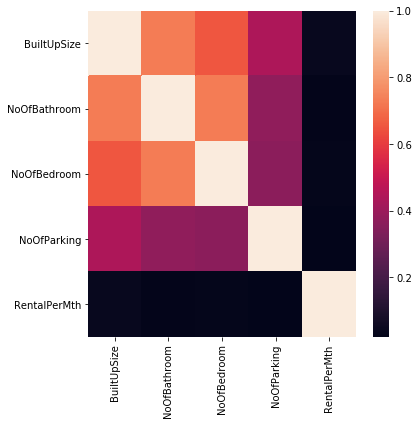

In [21]:
# visualize correlation matrix
plt.subplots(figsize=(6,6))

fig = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

fig.get_figure().savefig("heatmap.png", bbox_inches="tight") 

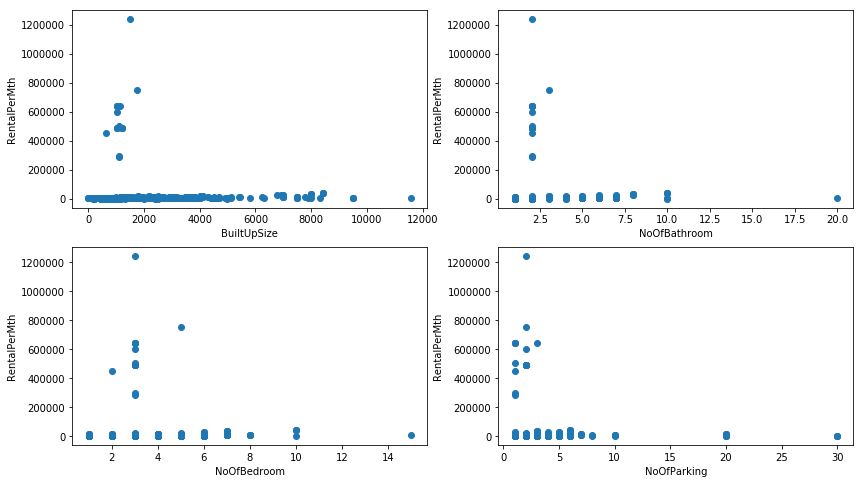

In [22]:
# visualize the relationship using scatter plots

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.scatter(x=rental["BuiltUpSize"], y=rental["RentalPerMth"])
plt.xlabel("BuiltUpSize")
plt.ylabel("RentalPerMth")

plt.subplot(2, 2, 2)
plt.scatter(x=rental["NoOfBathroom"], y=rental["RentalPerMth"])
plt.xlabel("NoOfBathroom")
plt.ylabel("RentalPerMth")

plt.subplot(2, 2, 3)
plt.scatter(x=rental["NoOfBedroom"], y=rental["RentalPerMth"])
plt.xlabel("NoOfBedroom")
plt.ylabel("RentalPerMth")

plt.subplot(2, 2, 4)
plt.scatter(x=rental["NoOfParking"], y=rental["RentalPerMth"])
plt.xlabel("NoOfParking")
plt.ylabel("RentalPerMth")

plt.savefig("scatterplots.png", bbox_inches="tight")
plt.show()

## One Hot Encoding

Before we build the model, we need to create dummy variables for the three categorical variables: "State", "Furnishing", "PropertyType". We need to perform one hot encoding for the categorical variables by using pandas `get_dummies()` function

In [23]:
# one hot encoding
rental_df = pd.get_dummies(rental)

rental_df.head()

,BuiltUpSize,NoOfBathroom,NoOfBedroom,NoOfParking,RentalPerMth,State_johor,State_kuala-lumpur,State_putrajaya,State_selangor,Furnishing_Fully Furnished,...,PropertyType_4-sty Terrace/Link House,PropertyType_Apartment,PropertyType_Bungalow,PropertyType_Cluster House,PropertyType_Condominium,PropertyType_Flat,PropertyType_Residential Land,PropertyType_Semi-detached House,PropertyType_Serviced Residence,PropertyType_Townhouse
0,1000,2,3,1,2200,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,1057,2,3,1,1980,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2,1488,3,3,3,4500,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,871,2,2,2,2500,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,700,1,1,1,1300,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
# check summary info to see if one hot encoding is done properly
print(rental_df.shape, "\n")
rental_df.info()

(13086, 27) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13086 entries, 0 to 13085
Data columns (total 27 columns):
BuiltUpSize                                13086 non-null int64
NoOfBathroom                               13086 non-null int64
NoOfBedroom                                13086 non-null int64
NoOfParking                                13086 non-null int64
RentalPerMth                               13086 non-null int64
State_johor                                13086 non-null uint8
State_kuala-lumpur                         13086 non-null uint8
State_putrajaya                            13086 non-null uint8
State_selangor                             13086 non-null uint8
Furnishing_Fully Furnished                 13086 non-null uint8
Furnishing_Partly Furnished                13086 non-null uint8
Furnishing_Unfurnished                     13086 non-null uint8
PropertyType_1-sty Terrace/Link House      13086 non-null uint8
PropertyType_1.5-sty Terrace/Link House    13

***
# Train and Build Models

In [25]:
# separate data into X features and Y target
X = rental_df.drop(columns=["RentalPerMth"])
Y = rental_df["RentalPerMth"]

In [26]:
# split data into random train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

***
# <a name="lr">Linear Regression</a> #

In [27]:
# train a Linear Regression Model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
# make prediction
y_pred = regressor.predict(X_test)

In [29]:
# calculate R-squared
print("Liner Regression R-squared: {}".format(regressor.score(X_test, y_test)))

Liner Regression R-squared: 0.011103384466319643


In [30]:
# another method of calculating R-squared
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test, y_pred)

print("Liner Regression R-squared: {}".format(lin_r2))

Liner Regression R-squared: 0.011103384466319643


**Note: ** Only 1.11%% of the variability in Y can be explained using X

In [31]:
# calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print("Liner Regression RMSE: {}".format(lin_rmse))

Liner Regression RMSE: 20794.798131009113


In [32]:
# calculate mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print("Liner Regression MAE: {}".format(lin_mae))

Liner Regression MAE: 1967.8595968412856


In [33]:
importance = regressor.coef_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} : {}'.format(X_train.columns[index], (importance[index] )))

PropertyType_3-sty Terrace/Link House : -2698.8198981121855
PropertyType_Semi-detached House : -2166.8004011021376
PropertyType_Cluster House : -1927.3584206983423
PropertyType_2.5-sty Terrace/Link House : -1471.2607822172654
PropertyType_1.5-sty Terrace/Link House : -1338.0178092697836
PropertyType_Residential Land : -1324.8432952889532
PropertyType_4-sty Terrace/Link House : -1018.9142000264341
State_putrajaya : -883.5093092927741
Furnishing_Partly Furnished : -791.1347826609547
PropertyType_Flat : -636.9949231707747
PropertyType_Townhouse : -528.9737073648474
State_selangor : -498.47567198551155
NoOfBathroom : -346.68195995750494
State_johor : -3.4666650104881
BuiltUpSize : 1.6757106015996666
PropertyType_Apartment : 55.93474581778895
Furnishing_Fully Furnished : 100.71612693958193
NoOfParking : 158.338428692874
PropertyType_Bungalow : 371.50639285163334
NoOfBedroom : 538.430955364699
PropertyType_2-sty Terrace/Link House : 549.4440345440973
Furnishing_Unfurnished : 690.418655721351

***
# <a name="rf">Random Forest</a> #

In [34]:
# train a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [35]:
# make prediction
y_pred = forest_reg.predict(X_test)

In [36]:
# calculate R-squared
print("Random Forest R-squared: {}".format(forest_reg.score(X_test, y_test)))

Random Forest R-squared: 0.03828359364262579


In [37]:
# another method of calculating R-squared
from sklearn.metrics import r2_score
forest_r2 = r2_score(y_test, y_pred)

print("Random Forest R-squared: {}".format(forest_r2))

Random Forest R-squared: 0.03828359364262579


**Note: ** R-squared improved to 0.03828 i.e. 3.828% of the variability in Y can be explained using X

In [38]:
# calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regression RMSE: {}".format(forest_rmse))

Random Forest Regression RMSE: 20507.03043349019


In [39]:
# calculate mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error

forest_mae = mean_absolute_error(y_pred, y_test)
print("Random Forest Regression MAE: {}".format(forest_mae))

Random Forest Regression MAE: 1637.8646294285554


In [40]:
importance = forest_reg.feature_importances_

feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} : {}'.format(X_train.columns[index], (importance[index] )))

PropertyType_Residential Land : 1.0140648866278625e-10
PropertyType_4-sty Terrace/Link House : 3.463508606491574e-07
PropertyType_1.5-sty Terrace/Link House : 3.9848777946271113e-07
PropertyType_Cluster House : 1.8977048496755352e-06
State_putrajaya : 2.217159719795109e-06
PropertyType_Townhouse : 5.662725736237879e-06
PropertyType_3-sty Terrace/Link House : 5.829201386525867e-06
PropertyType_Flat : 6.728663657727065e-06
PropertyType_Semi-detached House : 8.150417156319736e-06
PropertyType_2.5-sty Terrace/Link House : 8.319446406612592e-06
PropertyType_Bungalow : 1.3167881151495239e-05
PropertyType_1-sty Terrace/Link House : 0.0034111034629002515
PropertyType_Condominium : 0.004414059199245718
PropertyType_Serviced Residence : 0.009175496775760888
PropertyType_Apartment : 0.011252053467124415
PropertyType_2-sty Terrace/Link House : 0.014179164476643422
State_johor : 0.023506720868006165
State_kuala-lumpur : 0.02416043097465247
NoOfBathroom : 0.025444295854642328
NoOfParking : 0.0406096

**Note: ** The most important features are BuiltUpSize, Furnishing, State, NoOfBedroom and so on. And the least important feature is PropertyType, which means that regardless of whether the property unit is a Condominium or Terrace/Link House, it does not matter much to the rental prices. This is an interesting insight.

***
# <a name="tf">Tensorflow with Keras</a> #

In [41]:
# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(tf.keras.__version__)

C:\Users\limchiahooi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0
2.1.6-tf


## Normalize features

To use neural network, we need to normalize features that use different scales and ranges. For each feature, subtract the mean of the feature and divide by the standard deviation. We can use `StandardScaler` module from sklearn.preprocessing, where<br>
z = (x - u) / s <br>
Although the model might converge without feature normalization, it makes training more difficult, and it makes the resulting model more dependent on the choice of units used in the input.

In [42]:
print(X_train.shape)
X_train.head()

(9814, 26)


,BuiltUpSize,NoOfBathroom,NoOfBedroom,NoOfParking,State_johor,State_kuala-lumpur,State_putrajaya,State_selangor,Furnishing_Fully Furnished,Furnishing_Partly Furnished,...,PropertyType_4-sty Terrace/Link House,PropertyType_Apartment,PropertyType_Bungalow,PropertyType_Cluster House,PropertyType_Condominium,PropertyType_Flat,PropertyType_Residential Land,PropertyType_Semi-detached House,PropertyType_Serviced Residence,PropertyType_Townhouse
4258,1000,2,2,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3355,890,2,3,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1135,990,2,3,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3639,1080,2,3,1,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
8996,996,2,3,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
print(X_test.shape)
X_test.head()

(3272, 26)


,BuiltUpSize,NoOfBathroom,NoOfBedroom,NoOfParking,State_johor,State_kuala-lumpur,State_putrajaya,State_selangor,Furnishing_Fully Furnished,Furnishing_Partly Furnished,...,PropertyType_4-sty Terrace/Link House,PropertyType_Apartment,PropertyType_Bungalow,PropertyType_Cluster House,PropertyType_Condominium,PropertyType_Flat,PropertyType_Residential Land,PropertyType_Semi-detached House,PropertyType_Serviced Residence,PropertyType_Townhouse
8484,579,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2070,960,2,3,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1453,698,1,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6308,1943,3,3,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9914,1250,2,2,2,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [44]:
# import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# define the scaler 
scaler = StandardScaler().fit(X_train[["BuiltUpSize", "NoOfBathroom", "NoOfBedroom", "NoOfParking"]])

# scale the train set
X_train[["BuiltUpSize", "NoOfBathroom", "NoOfBedroom", "NoOfParking"]] = scaler.transform(X_train[["BuiltUpSize", "NoOfBathroom", "NoOfBedroom", "NoOfParking"]])

# scale the test set
X_test[["BuiltUpSize", "NoOfBathroom", "NoOfBedroom", "NoOfParking"]] = scaler.transform(X_test[["BuiltUpSize", "NoOfBathroom", "NoOfBedroom", "NoOfParking"]])

C:\Users\limchiahooi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\limchiahooi\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\limchiahooi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [45]:
print(X_train.shape)
X_train.head()

(9814, 26)


,BuiltUpSize,NoOfBathroom,NoOfBedroom,NoOfParking,State_johor,State_kuala-lumpur,State_putrajaya,State_selangor,Furnishing_Fully Furnished,Furnishing_Partly Furnished,...,PropertyType_4-sty Terrace/Link House,PropertyType_Apartment,PropertyType_Bungalow,PropertyType_Cluster House,PropertyType_Condominium,PropertyType_Flat,PropertyType_Residential Land,PropertyType_Semi-detached House,PropertyType_Serviced Residence,PropertyType_Townhouse
4258,-0.182779,-0.044624,-0.685125,-0.545595,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3355,-0.382943,-0.044624,0.443601,-0.545595,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1135,-0.200976,-0.044624,0.443601,-0.545595,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3639,-0.037206,-0.044624,0.443601,-0.545595,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
8996,-0.190058,-0.044624,0.443601,-0.545595,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [46]:
print(X_test.shape)
X_test.head()

(3272, 26)


,BuiltUpSize,NoOfBathroom,NoOfBedroom,NoOfParking,State_johor,State_kuala-lumpur,State_putrajaya,State_selangor,Furnishing_Fully Furnished,Furnishing_Partly Furnished,...,PropertyType_4-sty Terrace/Link House,PropertyType_Apartment,PropertyType_Bungalow,PropertyType_Cluster House,PropertyType_Condominium,PropertyType_Flat,PropertyType_Residential Land,PropertyType_Semi-detached House,PropertyType_Serviced Residence,PropertyType_Townhouse
8484,-0.948861,-1.379814,-1.813852,-0.545595,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2070,-0.255566,-0.044624,0.443601,-0.545595,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1453,-0.732320,-1.379814,-1.813852,-0.545595,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6308,1.533171,1.290565,0.443601,-0.545595,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9914,0.272139,-0.044624,-0.685125,0.558192,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


**Note: ** Comparing the results before and after normalization, the StandardScaler seemed to work fine and the numeric features have been normalized as expected, despite the SettingWithCopyWarning.

## Create the model
We'll use Keras Sequential model with two densely connected hidden layers, and an output layer that returns a single, continuous value. Keras Sequential model is a linear stack of layers, you can easily create the model by passing a list of layer instances to the constructor, which you set up by running model = Sequential()

In this case, we picked 64 hidden units for the first and second layer of our model. We are setting the amount of freedom that we are allowing the network to have when it’s learning representations. If we would allow more hidden units, our network will be able to learn more complex representations but it will also be a more expensive operation that can be prone to overfitting. 

Remember that overfitting occurs when the model is too complex: it will describe random error or noise and not the underlying relationship that it needs to describe. In other words, the training data is modelled too well! Note that when we don’t have that much training data available, we should prefer to use a small network with very few hidden layers.

For the activation function, we will use Rectified Linear Unit (relu) which is one of the most common activation functions. You can also experiment with other activation functions like Hyperbolic Tangent (tanh).

If we want to get some information on the model that we have just created, we can use the attribute `output_shape` or the `summary()` function. We can also get the model configuration info using the `get_config()` function.

In [47]:
# import Sequential from keras.models
from keras.models import Sequential

# import Dense from keras.layers
from keras.layers import Dense

# initialize the constructor
model = Sequential()

# add a densely-connected layer with 64 units to the model:
model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))

# add another layer with 64 units
model.add(Dense(64, activation="relu"))

# add an output layer with 1 output unit
model.add(Dense(1))

Using TensorFlow backend.


In [48]:
# model output shape
print(model.output_shape)

# model summary
print(model.summary())

(None, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1728      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,953
Trainable params: 5,953
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
# model config
model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 26),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_1',
   'trainable': True,
   'units': 64,
   'use_bias': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_re

## Set up training

After the model is constructed, we will configure its learning process by calling the `compile` method. The `compile` method takes three important arguments:

- optimizer: This object specifies the training procedure. Pass it optimizer instances from the tf.train module, such as tf.train.AdamOptimizer, tf.train.RMSPropOptimizer, or tf.train.GradientDescentOptimizer. In this case we will use tf.train.RMSPropOptimizer with learning rate = 0.001
- loss: The function to minimize during optimization. Common choices include mean square error (mse), categorical_crossentropy, and binary_crossentropy. Loss functions are specified by name or by passing a callable object from the tf.keras.losses module. In this case, we will use mean square error (mse)
- metrics: Used to monitor training. These are string names or callables from the tf.keras.metrics module. In this case, we will use mean absolute error (mae)


In [50]:
optimizer = tf.train.RMSPropOptimizer(0.001)

model.compile(loss="mse",
              optimizer=optimizer,
              metrics=["mae"])

## Train the model

The model is trained for 50 epochs. Validation_split is 0.2 or 20% of the training data to be used as validation data, the model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. We will leave the batch_size at default 32. Lastly, we set the verbose argument to 1 so that we can see logs appearing. 

In [51]:
model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

Train on 7851 samples, validate on 1963 samples
Epoch 1/50
7851/7851 [==============================] - 0s 48us/step - loss: 501679120.8302 - mean_absolute_error: 2821.3717 - val_loss: 420176765.4819 - val_mean_absolute_error: 2637.7967
Epoch 2/50
7851/7851 [==============================] - 0s 31us/step - loss: 500490138.5320 - mean_absolute_error: 2586.0315 - val_loss: 417969846.4082 - val_mean_absolute_error: 2207.6203
Epoch 3/50
7851/7851 [==============================] - 0s 31us/step - loss: 497577985.2430 - mean_absolute_error: 1974.3650 - val_loss: 414970762.7412 - val_mean_absolute_error: 1508.7370
Epoch 4/50
7851/7851 [==============================] - 0s 27us/step - loss: 494791857.9672 - mean_absolute_error: 1455.4276 - val_loss: 412998620.2042 - val_mean_absolute_error: 1293.1491
Epoch 5/50
7851/7851 [==============================] - 0s 31us/step - loss: 493660712.1682 - mean_absolute_error: 1417.8613 - val_loss: 412587157.3683 - val_mean_absolute_error: 1315.7168
Epoch 6

Epoch 44/50
7851/7851 [==============================] - 0s 28us/step - loss: 492625445.7450 - mean_absolute_error: 1264.3333 - val_loss: 412616744.2465 - val_mean_absolute_error: 1195.3791
Epoch 45/50
7851/7851 [==============================] - 0s 27us/step - loss: 492587638.5394 - mean_absolute_error: 1268.0380 - val_loss: 412612004.0050 - val_mean_absolute_error: 1198.5701
Epoch 46/50
7851/7851 [==============================] - 0s 28us/step - loss: 492618468.2619 - mean_absolute_error: 1262.7867 - val_loss: 412552203.3663 - val_mean_absolute_error: 1197.6467
Epoch 47/50
7851/7851 [==============================] - 0s 27us/step - loss: 492689539.3980 - mean_absolute_error: 1257.5939 - val_loss: 412498185.0207 - val_mean_absolute_error: 1192.8149
Epoch 48/50
7851/7851 [==============================] - 0s 26us/step - loss: 492658393.1726 - mean_absolute_error: 1260.8597 - val_loss: 412518369.9722 - val_mean_absolute_error: 1194.5743
Epoch 49/50
7851/7851 [===========================

## Predict Values

In [52]:
y_pred = model.predict(X_test)

## Evaluate Model

In [53]:
[mse, mae] = model.evaluate(X_test, y_test, verbose=1)

3272/3272 [==============================] - 0s 24us/step


In [54]:
keras_rmse = np.sqrt(int(mse))
keras_mae = mae

print("Testing set Root Mean Squared Error: RM{}".format(keras_rmse))
print("Testing set Mean Absolute Error: RM{}".format(mae))

Testing set Root Mean Squared Error: RM20931.979385619507
Testing set Mean Absolute Error: RM1432.1632491953508


Since keras does not have the R-squared metric built in, we will use `r2_score` function from sklearn

In [55]:
# calculate R-squared
from sklearn.metrics import r2_score
keras_r2 = r2_score(y_test, y_pred)

print("Tensorflow with Keras Sequential model R-squared: {}".format(keras_r2))

Tensorflow with Keras Sequential model R-squared: -0.0019869580197668935


***
# Comparison and Evaluation
In this section, we will put together the results from all three models and compare them side by side in order to evaluate their performance. The metrics that we use for evaluation are R-squared, Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE).

1. R-squared
 - coefficient of determination
 - goodness-of-fit indicator
 - summarizes the explanatory power of the regression model
 - higher values are better
<br>
<br>
2. Root Mean Squared Error (RMSE)
 - square root of the average of squared differences between prediction and actual observation
 - lower values are better
<br>
<br>
3.  Mean Absolute Error (MAE)
 - average of the absolute value of the difference between the forecasted value and the actual value
 - lower values are better
<br>
<br>

Similarities
- Both MAE and RMSE express average model prediction error in units of the variable of interest

Differences
- RMSE gives a relatively high weight to large errors which means it is more useful when large errors are particularly undesirable. However, from an interpretation standpoint, MAE is clearly the winner as it measures the average error and is thus easier to understand and interpret.

Evaluation
- Willmott and Matsuura (2005) have suggested that the RMSE is not a good indicator of average model performance and might be a misleading indicator of average error and thus the MAE would be a better metric for that purpose. Willmott et al. (2009) also concluded that sums-of-squares-based error statistics such as RMSE have inherent ambiguities and recommended the use of alternatives such as MAE. To determine the best model, we need to specify what "best" means. In this case, we want to use the model to predict rental prices, it is important that the model selected is the one that minimizes prediction error, and MAE provides a more intuitive indicator of average error of the predicted values, which is easy to understand and interpret.

In [56]:
# compile all results into one dataframe
data = {"Model": ["Linear Regression", "Random Forest", "TF Keras"], 
        "R-squared": [lin_r2, forest_r2,keras_r2],           
        "RMSE": [lin_rmse, forest_rmse, keras_rmse],
        "MAE": [lin_mae, forest_mae, keras_mae]}

results = pd.DataFrame(data=data)
results

,Model,R-squared,RMSE,MAE
0,Linear Regression,0.011103,20794.798131,1967.859597
1,Random Forest,0.038284,20507.030433,1637.864629
2,TF Keras,-0.001987,20931.979386,1432.163249


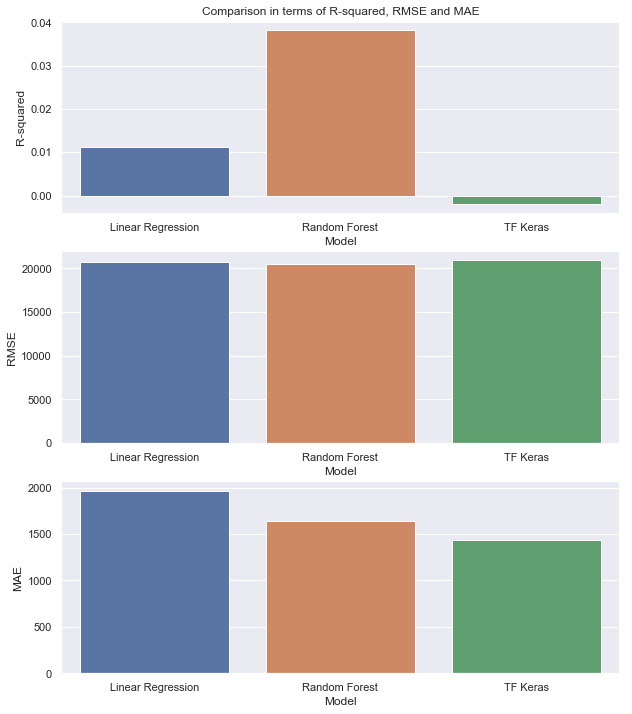

In [57]:
# visualize the results using bar charts
sns.set(rc={'figure.figsize':(10, 12)})

plt.subplot(3, 1, 1)
sns.barplot(x="Model", y="R-squared", data=results).set_title('Comparison in terms of R-squared, RMSE and MAE')

plt.subplot(3, 1, 2)
sns.barplot(x="Model", y="RMSE", data=results)

plt.subplot(3, 1, 3)
sns.barplot(x="Model", y="MAE", data=results)

plt.savefig("predict-rental-prices.png")

In [58]:
# have a look at the statistics of the RentalPerMth column
with pd.option_context('float_format', '{:f}'.format): print(rental["RentalPerMth"].describe())

count     13086.000000
mean       2879.990601
std       21623.624529
min         110.000000
25%        1400.000000
50%        1800.000000
75%        2500.000000
max     1240000.000000
Name: RentalPerMth, dtype: float64


***
# <a name="conclusion">Discussion and Conclusion</a> #


Based on the three models trained, the Random Forest model has the highest R-squared value of 0.038284 i.e. 3.8% of the variability in rental prices can be explained using the seven features i.e. BuiltUpSize, NoOfBathroom, NoOfBedroom, and NoOfParking, State, Furnishing, PropertyType. The most important features are BuiltUpSize, Furnishing, and State. And the least important feature is PropertyType, which means that regardless of whether the property unit is a Condominium or Terrace/Link House, it does not matter to the rental prices. This is an interesting insight as it contradicts the popular belief that landed properties such as Terrace/Link House often command higher rental prices in Malaysia. 

For root mean squared error (RMSE), the Random Forest model returns the lowest RMSE value (RM20,507). While for mean absolute error (MAE), Tensorflow with Keras Sequential Model returns the lowest MAE value of RM1,432 after 50 iterations. But is this considered a good (low) error? From the summary statistics of the RentalPerMth column, we know that the rental value ranges from RM110 (minimum) to RM1.24 million (maximum). The MAE of RM1,432 is not a small error considering the average rental is just RM2,879 i.e. the average error is almost half of the average rental.

## Suggestions for Improvement
- collect more data, include more states like Penang and other parts of Malaysia
- select other features or conduct feature engineering on existing features
- further fine tune the hyperparameters of the models

## Conclusion
In this project, we have trained three models using different algorithms to predict rental prices. We then evaluated those models based on R-squared, RMSE and MAE values. Random Forest model returned the highest R-squared value and the lowest RMSE value, while Tensorflow with Keras Sequential Model performed the best in terms of MAE (lowest). It can be argued that Tensorflow with Keras Sequential Model is the best among the three models to be used to predict rental prices as it produces the lowest value of MAE. However, it should be pointed out that all three models have very low R-squared value which indicates that the models lack convincing explanatory power. The low R-squared values and relatively high MAE values show that it is harder to develop a model to predict rental prices than one would think. 

Further works are needed in terms of data collection, feature selection, feature engineering and hyperparameter tuning. Nevertheless, this project should serve as a good reference for those interested in the prediction of rental prices for properties located in Malaysia. If you have any feedback for this project, feel free to contact me via my [LinkedIn](https://www.linkedin.com/in/limchiahooi) or [GitHub Pages](https://limchiahooi.github.io).

***
### References
- https://www.tensorflow.org/guide/keras
- https://www.tensorflow.org/tutorials/keras/basic_regression
- https://datascienceplus.com/linear-regression-in-python-predict-the-bay-areas-home-prices/
- https://www.datacamp.com/community/tutorials/deep-learning-python
- https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d